<a href="https://colab.research.google.com/github/Femonello/bootcamp-data-analytics/blob/main/Desafio_Final_Estatistica_Freq_e_Medidas_Fernanda_Monello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Final - Estatatistica Frequências e Medidas**

Análise de base de dados enem.

**Objetivo** é retirar informações da basede dados do enem do ano anterior para alinhar melhor as estratégias docursinho para cada estudante.

In [21]:
#importação das bibliotecas base
import pandas as pd
import numpy as np

#bibliotecas de visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#biblicotecas estatíticas
import scipy.stats as stat


In [22]:
#mount arquivo do drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [23]:
#Leitura dos arquivo
df = pd.read_json('/content/drive/MyDrive/Womakers - Datasets/enem_2023.json')
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [24]:
#Tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [25]:
# Contar registros nulos em cada coluna
null_counts = df.isnull().sum()
null_counts


,0
Linguagens,103
Ciências humanas,64
Ciências da natureza,176
Matemática,76
Redação,140
Sexo,0


## **Questões**



In [52]:
# exibindo informações estatísticas para o dataframe e adicionando calculo de amplituda
def novo_describe(df):
  dfTemp = df.describe()
  dfTemp.loc['amplitude'] = dfTemp.loc['max'] - dfTemp.loc['min']
  return dfTemp

In [53]:
novo_describe(df)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,media_ponderada
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,517.467162,528.351454,502.142101,537.172480,641.193123,549.650405
std,82.113520,76.786787,78.419720,87.850751,115.578585,46.150440
min,287.000000,289.900000,314.400000,319.800000,290.308608,421.079852
25%,462.647968,475.858622,449.998135,477.018471,558.524958,515.297069
50%,517.128831,528.503263,502.935209,532.961486,639.602691,547.689168
75%,572.645407,584.115231,552.260535,591.335247,715.550093,583.503881
max,804.456317,763.919695,802.004568,807.877902,931.305275,682.987732
amplitude,517.456317,474.019695,487.604568,488.077902,640.996667,261.907881


### 1. Qual das disciplinas tem a maior amplitude de nota?



In [28]:
#identificando a matéria com maior amplitude e o respectivo resultado

max_amplitude_value = novo_describe(df).loc['amplitude'].max()
max_amplitude_disciplina = novo_describe(df).loc['amplitude'].idxmax()
print(f"A disciplina com a maior amplitude é {max_amplitude_disciplina} com {max_amplitude_value}")

A disciplina com a maior amplitude é Redação com 729.1600351395


###  2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos osvalores nulos quando considerar a mediana)


A mediana está representada pelo quartil 50% na saída da função describe(). O Pandas, por padrão, ignora os valores nulos ao calcular estatísticas descritivas, como média, mediana e desvio padrão, considerando apenas os valores não nulos da coluna.

Podemos verificar essa informação através do calculo abaixo:

In [32]:
# verificando media e mediana de dados não nulos

media_por_disciplina = df.mean(numeric_only=True)
mediana_por_disciplina = df.median(numeric_only=True)

print("Média por disciplina:")
print(media_por_disciplina)

print("\nMediana por disciplina:")
print(mediana_por_disciplina)

Média por disciplina:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

Mediana por disciplina:
Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64


### 3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:



* Redação - 2
* Matemática e suas Tecnologias - 4
* Linguagens, Códigos e suas Tecnologias - 2
* Ciências Humanas e suas Tecnologias - 1
* Ciências da Natureza e suas Tecnologias - 1
  
  Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [54]:
# Primeiro passo será remover os registros ausentes

df= df.dropna().copy()

# criar uma coluna aplicando o peso das notas e a média ponderada dessas notas

df['media_ponderada'] = (df['Redação'] * 2 + df['Matemática'] * 4 + df['Linguagens'] * 2 + df['Ciências humanas'] * 1 + df['Ciências da natureza'] * 1) / 10

# Ordenar o DataFrame pela coluna 'media_ponderada' em ordem decrescente
df = df.sort_values(by='media_ponderada', ascending=False)
# Primeiro passo será remover os registros ausentes

df= df.dropna().copy()

# criar uma coluna aplicando o peso das notas e a média ponderada dessas notas

df['media_ponderada'] = (df['Redação'] * 2 + df['Matemática'] * 4 + df['Linguagens'] * 2 + df['Ciências humanas'] * 1 + df['Ciências da natureza'] * 1) / 10

# Ordenar o DataFrame pela coluna 'media_ponderada' em ordem decrescente
df = df.sort_values(by='media_ponderada', ascending=False)

# Selecionar os 500 melhores estudantes e armazenando no top500 drataframe
top500 = df.head(500)
top500


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,media_ponderada
25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,682.987732
824,533.812379,611.760520,494.994598,807.877902,697.570213,Não idenficado,680.103191
702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem,671.265814
129,583.015454,434.261543,588.516699,687.621711,852.273821,Mulher,664.384364
60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher,658.597791
...,...,...,...,...,...,...,...
400,515.892318,398.431513,440.731835,522.484700,478.946903,Homem,491.878059
160,539.397184,608.405447,314.400000,507.648230,440.950905,Mulher,491.409454
529,416.114140,438.110249,429.881954,462.605411,679.843696,Mulher,491.032952
386,537.838737,570.471430,584.935736,437.841844,459.122741,Homem,490.069750


In [44]:
#Calculando a média e o desvio padrão

media_top500 = top500['media_ponderada'].mean()
desvio_padrao_top500 = top500['media_ponderada'].std()

#Exibindo resultado
print(f"Desvio padrão das notas dos 500 estudantes mais bem colocados considerando os critérios: {desvio_padrao_top500:.2f}")
print(f"Média das notas dos 500 estudantes mais bem colocados considerando os critérios: {media_top500:.2f}")



Desvio padrão das notas dos 500 estudantes mais bem colocados considerando os critérios: 40.44
Média das notas dos 500 estudantes mais bem colocados considerando os critérios: 557.29


### 4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [45]:
#Considerando todos os estudantes do DataFrame top500

aprovadosCienciaDaComputacao = top500.head(40)

#calculando a variancia das notas
variancia_aprovadosCienciaDaComputacao = aprovadosCienciaDaComputacao['media_ponderada'].var()

#calculando a média
media_aprovadosCienciaDaComputacao = aprovadosCienciaDaComputacao['media_ponderada'].mean()

#exibindo resultados

print(f"A variância das notas dos estudantes que seriam aprovados no curso de ciência da computação é: {variancia_aprovadosCienciaDaComputacao:.2f}")
print(f"A média das notas dos estudantes que seriam aprovados no curso de ciência da computação é: {media_aprovadosCienciaDaComputacao:.2f}")

A variância das notas dos estudantes que entraram no curso de ciência da computação é: 295.77
A média das notas dos estudantes que entraram no curso de ciência da computação é: 636.68


### 5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [46]:

q3math = df['Matemática'].quantile(0.75)
q3lang = df['Linguagens'].quantile(0.75)

# exibindo valores
print(f"O valor do teto do terceiro quartil para as disciplinas de matemática é: {q3math}")
print(f"O valor do teto do terceiro quartil para as disciplinas de linguagens é: {q3lang}")


O valor do teto do terceiro quartil para as disciplinas de matemática é: 591.335247441725
O valor do teto do terceiro quartil para as disciplinas de linguagens é: 572.64540727285


### 6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique senão assimétricas?

<Figure size 600x800 with 0 Axes>

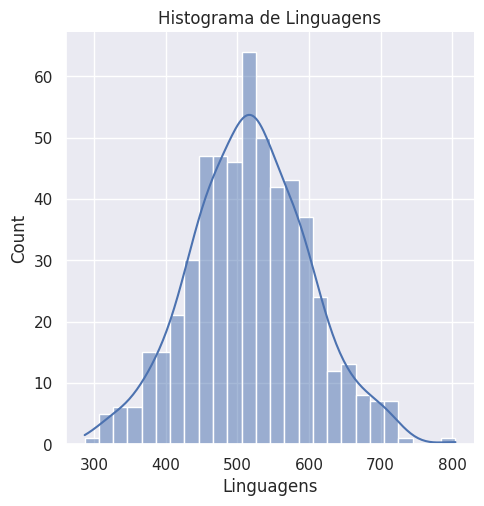

<Figure size 600x800 with 0 Axes>

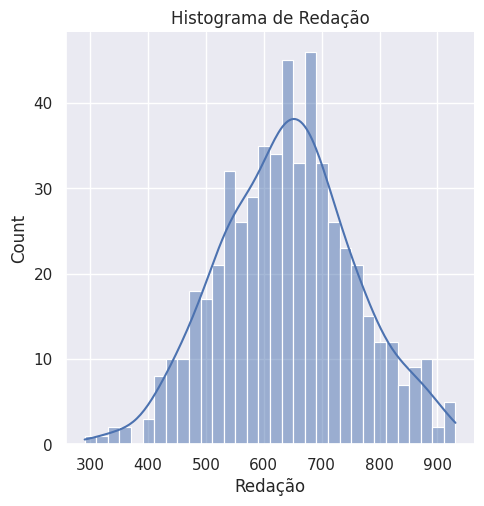

In [56]:
# histograma

plt.rcParams['figure.figsize'] = [6,8] #definindo o tamanho da figura através do dicionário global do Matplotlib
sns.set_theme() # configurando o tema visual dos gráficos gerados pelo Seaborn

disciplinas = ['Redação', 'Linguagens']

# Selecionando colunas numéricas somente das disciplinas selecionadas
colunas_selecionadas = [col for col in df.select_dtypes(include=np.number).columns if col in disciplinas]

for colunas in colunas_selecionadas:
  plt.figure()
  sns.displot(data=df, x=colunas, kde=True, binwidth=20) #criando o gráfico, incluindo curva de probabilidades (kde) e definindo a largura dos intervalos (binwidth)
  plt.title(f'Histograma de {colunas}')
  plt.show()

**Análise da simetria**

Com base nos resultados obtidos, podemos afirmar que os gráficos apresentam uma distribuição simétrica. Isso é evidenciado pela forma da distribuição, que é muito semelhante, com uma distribuição quase idêntica de ambos os lados do centro. Essa simetria também pode ser observada na curva de densidade (KDE).

A análise de simetria também deve se basear em parâmetros estatísticos: resultado da média e da mediana. Para que uma distribuição seja considerada simétrica, a média e a mediana precisam ser aproximadamente iguais.

Nos dois casos, a diferença entre a média e a mediana é muito pequena:

* Linguagens: média = 514.524809, mediana = 515.045250, com uma diferença de menos de 1;
* Redação: média = 637.783532, mediana = 635.273973, com uma diferença de cerca de 2.

Como as diferenças são mínimas, não são grandes o suficiente para indicar uma assimetria significativa. Portanto, a ideia de que os histogramas são simétricos é respaldada pelas médias e medianas muito próximas entre si.

### 7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

<Figure size 600x800 with 0 Axes>

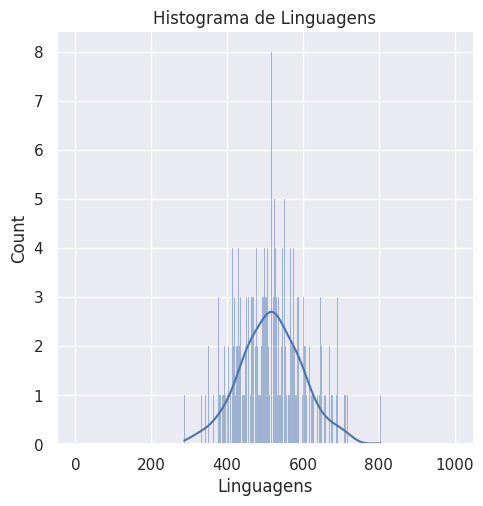

<Figure size 600x800 with 0 Axes>

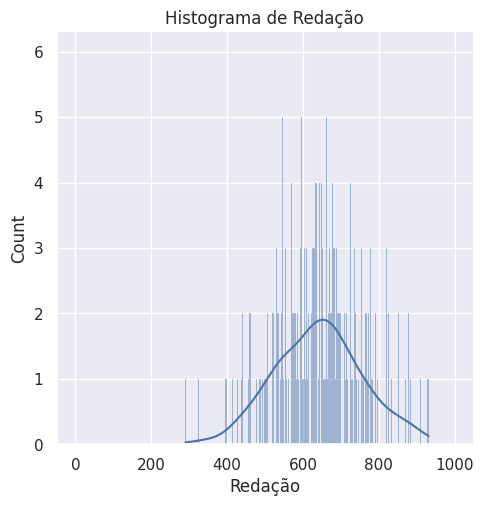

In [62]:
# histograma

plt.rcParams['figure.figsize'] = [6,8] #definindo o tamanho da figura através do dicionário global do Matplotlib
sns.set_theme() # configurando o tema visual dos gráficos gerados pelo Seaborn

disciplinas = ['Redação', 'Linguagens']

# Selecionando colunas numéricas somente das disciplinas selecionadas
colunas_selecionadas = [col for col in df.select_dtypes(include=np.number).columns if col in disciplinas]

for colunas in colunas_selecionadas:
  plt.figure()
  sns.displot(data=df, x=colunas, kde=True, bins=range(0,1000)) #criando o gráfico, incluindo curva de probabilidades (kde) e definindo a largura dos intervalos (binwidth)
  plt.title(f'Histograma de {colunas}')
  plt.show()

 **Análise com novo intervalo**

 A simetria ainda é válida uma vez que  as médias e medianas continuam próximas. Além disso, é possível observar que a curva de densidade (kde) permanece com uma distribuição quase idêntica de ambos os lados do centro, reforçando o resultado inicial simetria